In [1]:
import Actions
import Agent
import Maze
import Policy
from Evaluation import Evaluation

import copy
import matplotlib.pyplot as plt


# Maze setup

In [2]:
maze = Maze.Maze()
maze.set_reward((0, 3), 40)
maze.set_reward((1, 2), -10)
maze.set_reward((1, 3), -10)
maze.set_reward((3, 0), 10)
maze.set_reward((3, 1), -2)

maze.assign_maze_states()
maze.set_terminal((0, 3), True)
maze.set_terminal((3, 0), True)

In [3]:
# Setup policy and agent
policy = Policy.Policy(lenght=4, width=4)
agent = Agent.Agent(maze, policy, maze.maze_states[3][2],1)
# activate the value iteration algorithm
agent.value_function()

# Evaluatie setup

In [4]:
evaluation_gamma_1 = Evaluation(learning_rate= 0.1, discount_factor= 1, epsilon= 0.1)
evaluation_gamma_0_9 = Evaluation(learning_rate= 0.1, discount_factor= 0.9, epsilon= 0.1)
evaluation_gamma_0_5 = Evaluation(learning_rate= 0.1, discount_factor= 0.5, epsilon= 0.1)

In [5]:
print("TD learning:")
agent_policy1 = copy.deepcopy(agent.policy)
agent_policy2 = copy.deepcopy(agent.policy)

print("Gamma = 1")
maze_values_1 = copy.deepcopy(evaluation_gamma_1.temporal_difference_learning(agent_policy1, maze))

print("Gamma = 0.5")
maze_values_2 = copy.deepcopy(evaluation_gamma_0_5.temporal_difference_learning(agent_policy2, maze))

TD learning:
Gamma = 1
6.00 39.00 40.00 0.00 
10.00 38.00 1.00 7.00 
6.00 37.00 36.00 5.00 
0.00 10.00 35.00 4.00 

Gamma = 0.5
7.00 19.00 40.00 0.00 
10.00 8.50 10.00 7.00 
8.00 3.25 0.62 4.00 
0.00 3.00 -0.69 3.00 



In [6]:
print("Gamma = 1")
SARSA_Q_map_1 = evaluation_gamma_1.SARSA(maze)
print("Gamma = 0.9")
SARSA_Q_map_0_9 = evaluation_gamma_0_9.SARSA(maze)

Gamma = 1
(0, 0) LEFT 35.97 RIGHT 37.52 UP 36.20 DOWN 35.06 
(0, 1) LEFT 36.30 RIGHT 38.75 UP 37.20 DOWN 35.14 
(0, 2) LEFT 37.28 RIGHT 40.00 UP 38.18 DOWN 28.10 
(0, 3) LEFT 0.00 RIGHT 0.00 UP 0.00 DOWN 0.00 

(1, 0) LEFT 35.20 RIGHT 35.91 UP 36.40 DOWN 33.81 
(1, 1) LEFT 35.33 RIGHT 28.55 UP 37.48 DOWN 34.63 
(1, 2) LEFT 35.97 RIGHT 28.81 UP 38.94 DOWN 33.85 
(1, 3) LEFT 24.46 RIGHT 27.03 UP 40.00 DOWN 30.77 

(2, 0) LEFT 31.27 RIGHT 34.79 UP 35.33 DOWN 10.00 
(2, 1) LEFT 33.82 RIGHT 33.50 UP 36.22 DOWN 32.57 
(2, 2) LEFT 35.19 RIGHT 31.72 UP 28.54 DOWN 32.30 
(2, 3) LEFT 32.94 RIGHT 32.24 UP 29.33 DOWN 31.30 

(3, 0) LEFT 0.00 RIGHT 0.00 UP 0.00 DOWN 0.00 
(3, 1) LEFT 10.00 RIGHT 32.27 UP 34.68 DOWN 32.82 
(3, 2) LEFT 32.68 RIGHT 31.34 UP 33.80 DOWN 32.25 
(3, 3) LEFT 32.54 RIGHT 31.27 UP 31.86 DOWN 31.37 

Gamma = 0.9
(0, 0) LEFT 4.41 RIGHT 4.97 UP 2.00 DOWN 1.34 
(0, 1) LEFT 4.45 RIGHT 5.02 UP 5.57 DOWN 10.00 
(0, 2) LEFT 7.57 RIGHT 5.80 UP 4.93 DOWN 3.86 
(0, 3) LEFT 0.00 RIGHT 0

In [7]:
print("Gamma = 1")
Q_learning_Q_map_1 = evaluation_gamma_1.Q_learning(maze)
print("Gamma = 0.9")
Q_learning_Q_map_0_9 = evaluation_gamma_0_9.Q_learning(maze)

Gamma = 1
(0, 0) LEFT 37.00 RIGHT 38.00 UP 36.98 DOWN 35.98 
(0, 1) LEFT 37.00 RIGHT 39.00 UP 38.00 DOWN 37.00 
(0, 2) LEFT 38.00 RIGHT 40.00 UP 39.00 DOWN 29.00 
(0, 3) LEFT 0.00 RIGHT 0.00 UP 0.00 DOWN 0.00 

(1, 0) LEFT 35.92 RIGHT 37.00 UP 36.95 DOWN 34.94 
(1, 1) LEFT 36.00 RIGHT 29.00 UP 38.00 DOWN 36.00 
(1, 2) LEFT 37.00 RIGHT 30.00 UP 39.00 DOWN 35.00 
(1, 3) LEFT 17.61 RIGHT 16.60 UP 40.00 DOWN 19.65 

(2, 0) LEFT 35.00 RIGHT 36.00 UP 35.97 DOWN 9.97 
(2, 1) LEFT 35.00 RIGHT 35.00 UP 37.00 DOWN 34.00 
(2, 2) LEFT 36.00 RIGHT 34.00 UP 29.00 DOWN 34.00 
(2, 3) LEFT 35.00 RIGHT 34.00 UP 30.00 DOWN 33.00 

(3, 0) LEFT 0.00 RIGHT 0.00 UP 0.00 DOWN 0.00 
(3, 1) LEFT 10.00 RIGHT 34.00 UP 36.00 DOWN 34.00 
(3, 2) LEFT 34.00 RIGHT 33.00 UP 35.00 DOWN 34.00 
(3, 3) LEFT 33.98 RIGHT 32.99 UP 34.00 DOWN 32.97 

Gamma = 0.9
(0, 0) LEFT 26.45 RIGHT 30.50 UP 26.45 DOWN 22.80 
(0, 1) LEFT 26.45 RIGHT 35.00 UP 30.50 DOWN 26.45 
(0, 2) LEFT 30.50 RIGHT 40.00 UP 35.00 DOWN 21.50 
(0, 3) LEFT 0.

# Visualisation

## Utils functions

In [8]:
def print_sidebyside_Q_map(Q_map1,Q_map2):

    for index, row in enumerate(Q_map1):
        for index2, col in enumerate(row):
            print(col[0][0].position, end=" ")
            print("Gamma = 1", end=" ")
            for index3, action in enumerate(col):
                print(action[1].name, end=" ")
                print("%#06.3f" % action[2], end=" ")
                print(" | ", end=" ")
            print("            Gamma = 0.9", end=" ")
            print(" | ", end=" ")
            for index3, action in enumerate(Q_map2[index][index2]):
                print(action[1].name, end=" ")
                print("%#06.3f" % action[2], end=" ")
                print(" | ", end=" ")
            print()
        print()


In [9]:
def get_best_action_from_Q_map_state(state):
    best_action = None
    best_v = -100000
    for action in state:
        if action[2] > best_v:
            best_v = action[2]
            best_action = action[1]
    return best_action

In [10]:
def print_policy_based_of_Q_map(Q_map):
    for index, row in enumerate(Q_map):
        for index2, col in enumerate(row):
            #print(col[0][0].position, end=" ")
            if col[0][0].terminal:
                print("NONE", end=" ")
            else:
                action = get_best_action_from_Q_map_state(col)
                print(action.name, end=" ")
        print()

## TD Learning

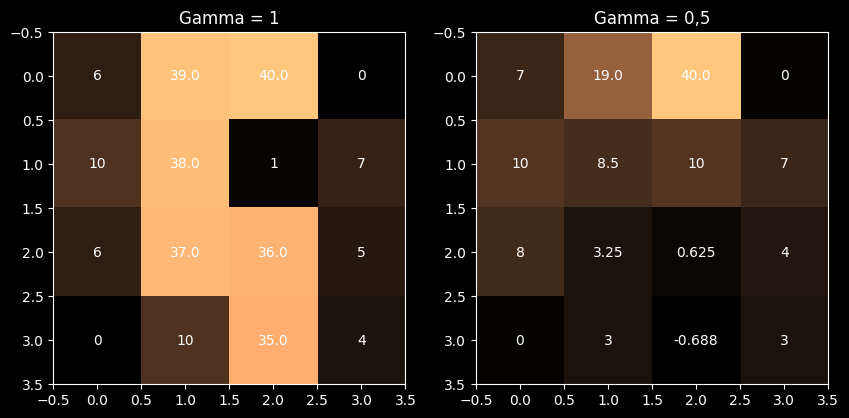

In [11]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 10))

data_array_1 = []
data_array_2 = []
for i in range(4):
    col1 = []
    col2 = []

    for j in range(4):
        col1.append(round(maze_values_1[i][j].value,3))
        col2.append(round(maze_values_2[i][j].value,3))
        ax1.text(j, i, round(maze_values_1[i][j].value,3), ha="center", va="center", color="w")
        ax2.text(j, i, round(maze_values_2[i][j].value,3), ha="center", va="center", color="w")

    data_array_1.append(col1)
    data_array_2.append(col2)
ax1.title.set_text('Gamma = 1')
ax2.title.set_text('Gamma = 0,5')
ax1.imshow(data_array_1, cmap='copper', interpolation='nearest')
ax2.imshow(data_array_2, cmap='copper', interpolation='nearest')

in de visualisatie is te zien dat in vergelijking met gamma = 1 dat de values van iedere state meer uniformer zijn dan de values van gamma = 0.5. Dit komt doordat de doormiddel van de gamma het algorithme minder ver de toekomst in kijkt en dus minder rekening houdt met de beloning die verder in de toekomst ligt.

## SARSA

In [12]:
print("SARSA:")
print_sidebyside_Q_map(SARSA_Q_map_1,SARSA_Q_map_0_9)

SARSA:
(0, 0) Gamma = 1 LEFT 35.974  |  RIGHT 37.518  |  UP 36.202  |  DOWN 35.062  |              Gamma = 0.9  |  LEFT 04.411  |  RIGHT 04.970  |  UP 02.000  |  DOWN 01.344  |  
(0, 1) Gamma = 1 LEFT 36.298  |  RIGHT 38.751  |  UP 37.199  |  DOWN 35.136  |              Gamma = 0.9  |  LEFT 04.454  |  RIGHT 05.022  |  UP 05.574  |  DOWN 10.002  |  
(0, 2) Gamma = 1 LEFT 37.278  |  RIGHT 40.000  |  UP 38.178  |  DOWN 28.104  |              Gamma = 0.9  |  LEFT 07.569  |  RIGHT 05.800  |  UP 04.934  |  DOWN 03.860  |  
(0, 3) Gamma = 1 LEFT 00.000  |  RIGHT 00.000  |  UP 00.000  |  DOWN 00.000  |              Gamma = 0.9  |  LEFT 00.000  |  RIGHT 00.000  |  UP 00.000  |  DOWN 00.000  |  

(1, 0) Gamma = 1 LEFT 35.203  |  RIGHT 35.915  |  UP 36.398  |  DOWN 33.815  |              Gamma = 0.9  |  LEFT 05.420  |  RIGHT 09.294  |  UP 05.457  |  DOWN 05.380  |  
(1, 1) Gamma = 1 LEFT 35.328  |  RIGHT 28.549  |  UP 37.484  |  DOWN 34.632  |              Gamma = 0.9  |  LEFT 06.385  |  RIGHT 05

In [13]:
print("Gamma = 1")
print_policy_based_of_Q_map(SARSA_Q_map_1)
print()
print("Gamma = 0.9")
print_policy_based_of_Q_map(SARSA_Q_map_0_9)

Gamma = 1
RIGHT RIGHT RIGHT NONE 
UP UP UP UP 
UP UP LEFT LEFT 
NONE UP UP LEFT 

Gamma = 0.9
RIGHT DOWN LEFT NONE 
RIGHT DOWN RIGHT UP 
RIGHT RIGHT RIGHT UP 
NONE RIGHT UP UP 


Op basis van de 2 geprinte policies is te zien dat de policy van gamma 0.9 lichte verschillen in zijn gekozen optimale acties heeft tegenover een gamma van 1. ook is te zien in de Q_map dat de values van gamma = 0.9 veel lager zijn dan die van gamma = 1. Dit komt doordat de reward uit (0.3) langzamer hand minder invloed heeft op de values van de states die verder weg liggen van die reward.

## Q Learning

In [14]:
print("Q-learning:")
print_sidebyside_Q_map(Q_learning_Q_map_1,Q_learning_Q_map_0_9)

Q-learning:
(0, 0) Gamma = 1 LEFT 36.995  |  RIGHT 38.000  |  UP 36.984  |  DOWN 35.982  |              Gamma = 0.9  |  LEFT 26.450  |  RIGHT 30.500  |  UP 26.450  |  DOWN 22.805  |  
(0, 1) Gamma = 1 LEFT 37.000  |  RIGHT 39.000  |  UP 38.000  |  DOWN 37.000  |              Gamma = 0.9  |  LEFT 26.450  |  RIGHT 35.000  |  UP 30.500  |  DOWN 26.450  |  
(0, 2) Gamma = 1 LEFT 38.000  |  RIGHT 40.000  |  UP 39.000  |  DOWN 29.000  |              Gamma = 0.9  |  LEFT 30.500  |  RIGHT 40.000  |  UP 35.000  |  DOWN 21.500  |  
(0, 3) Gamma = 1 LEFT 00.000  |  RIGHT 00.000  |  UP 00.000  |  DOWN 00.000  |              Gamma = 0.9  |  LEFT 00.000  |  RIGHT 00.000  |  UP 00.000  |  DOWN 00.000  |  

(1, 0) Gamma = 1 LEFT 35.923  |  RIGHT 37.000  |  UP 36.953  |  DOWN 34.939  |              Gamma = 0.9  |  LEFT 22.805  |  RIGHT 26.450  |  UP 26.450  |  DOWN 19.524  |  
(1, 1) Gamma = 1 LEFT 36.000  |  RIGHT 29.000  |  UP 38.000  |  DOWN 36.000  |              Gamma = 0.9  |  LEFT 22.805  |  RIG

In [15]:
print("Gamma = 1")
print_policy_based_of_Q_map(Q_learning_Q_map_1)
print()
print("Gamma = 0.9")
print_policy_based_of_Q_map(Q_learning_Q_map_0_9) 

Gamma = 1
RIGHT RIGHT RIGHT NONE 
RIGHT UP UP UP 
RIGHT UP LEFT LEFT 
NONE UP UP UP 

Gamma = 0.9
RIGHT RIGHT RIGHT NONE 
UP UP UP UP 
UP UP LEFT UP 
NONE UP UP UP 


Q Learning in vergelijking met SARSA geeft op eerste indruk dezelfde policies uit. maar als we naar de waardes kijken vertelt dit een ander verhaal. De values van Q Learning zijn veel meer uniformer en lichtelijk hoger dan die van SARSA. dit komt doordat Q Learning niet kijkt naar de volgende actie maar naar de beste actie die mogelijk is vanuit de volgende state. Hierdoor is de kans dat de agent in een state komt waar hij een beloning krijgt groter en dus de values van de states hoger.